# Importing Python Packages

In [1]:
import openpyxl
import xlrd
import os
import glob

from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

In [2]:
# import python packages

# import nltk (natural language tool kit)
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import requests
from lxml import html
import csv
import pandas as pd

from os import path

import matplotlib.pyplot as plt
%matplotlib inline


#regular expression
import re
#csv
import csv
# Excel-like format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))


# Importing Data

## Opening the Correct Directory

In [3]:
os.chdir('C:\\Users\\millsj.ADMIN\\Desktop\\GENBA 894\\2018_DataChallenges_Teradata\\National Teams\\')

In [4]:
# filenames
excel_names = ["2013-2017 National Team Activity.xlsx"]

# read them in
excels = [pd.ExcelFile(name) for name in excel_names]

# turn them into dataframes
frames = [x.parse(x.sheet_names[0],index_col=None) for x in excels]

# delete the first row for all frames except the first
# i.e. remove the header row -- assumes it's the first
frames[1:] = [df[1:] for df in frames[1:]]

# concatenate them..
nationalteams = pd.concat(frames)

# Check headers
nationalteams.head(3)

National Team Name Event Chapter Event Category           Event Type  \
0     Chevron Bike Team           ALC           Bike  MS 150 (2 Day Bike)   
1  EMD Serono Bike team           ALC           Bike           Bike 2 Day   
2                   NaN           ALC           Bike           Bike 2 Day   

  Local Team Name                         Event Name Event Start Date  \
0         Chevron  ALC 2016 Bike MS: Mississippi 150       2016-10-08   
1      EMD Serono    ALC 2017 Bike MS: Tour De Beach       2017-09-16   
2    Freewheelin'    ALC 2017 Bike MS: Tour De Beach       2017-09-16   

                 Location  Corporate Name  Revenue Raised  \
0                     NaN             NaN          1745.0   
1  Hampton Inns and Suite             NaN           390.0   
2  Hampton Inns and Suite             NaN           400.0   

                      ...                      Local Team Captain Call Status  \
0                     ...                                                   G   
1                     ...                                                   G   
2                     ...                                                   G   

   Local Team Captain Contact By Phone OK? (Y/N)  Local Team Captain City  \
0                                            Yes                   Mobile   
1                                            Yes                   Mobile   
2                                            Yes                Pensacola   

  Local Team Captain State/Province Local Team Captain Zip Code  \
0                                AL                     36695.0   
1                                AL                     36608.0   
2                                FL                     32506.0   

  Local Team Captain Bad Address Flag  \
0                                  No   
1                                  No   
2                                  No   

  Local Team Captain Contact By Mail OK? (Y/N) Local Team Captain Active Flag  \
0                                           No                            Yes   
1                                          Yes                            Yes   
2                                          Yes                            Yes   

  Local Team Captain Deceased Flag Local Team Captain Primary Connection To MS  
0                               No                                        None  
1                               No                               Friend has MS  
2                               No                                        None  

[3 rows x 27 columns]

In [6]:
# convert string to integers
#biketeams['Team Captain Accept Email'] = (biketeams['Team Captain Accept Email'] == 'TRUE').astype(int)

In [7]:
# make sure the conversion worked
#biketeams.head(3)

# Looking for Data Anomalies

In [8]:
# List of all headers
# nationalteams['National Team Name','Event Chapter','Event Category','Event Type','Local Team Name','Event Name','Event Start Date','Location','Corporate Name','Revenue Raised','Number of Team Members (local)','Local Team Captain Member ID','Local Team Captain Contact ID','Local Team Captain Email Domain','Local Team Captain Bad Email Flag','Local Team Captain Contact By Email OK? (Y/N)','Local Team Captain Phone Type','Local Team Captain Call Status','Local Team Captain Contact By Phone OK? (Y/N)','Local Team Captain City','Local Team Captain State/Province','Local Team Captain Zip Code','Local Team Captain Bad Address Flag','Local Team Captain Contact By Mail OK? (Y/N)','Local Team Captain Active Flag','Local Team Captain Deceased Flag','Local Team Captain Primary Connection To MS']

In [9]:
# counting zero values
print((nationalteams[['National Team Name','Event Chapter','Event Category','Event Type','Local Team Name','Event Name','Event Start Date','Location','Corporate Name','Revenue Raised','Number of Team Members (local)','Local Team Captain Member ID','Local Team Captain Contact ID','Local Team Captain Email Domain','Local Team Captain Bad Email Flag','Local Team Captain Contact By Email OK? (Y/N)','Local Team Captain Phone Type','Local Team Captain Call Status','Local Team Captain Contact By Phone OK? (Y/N)','Local Team Captain City','Local Team Captain State/Province','Local Team Captain Zip Code','Local Team Captain Bad Address Flag','Local Team Captain Contact By Mail OK? (Y/N)','Local Team Captain Active Flag','Local Team Captain Deceased Flag','Local Team Captain Primary Connection To MS']] == 0).sum())


National Team Name                                0
Event Chapter                                     0
Event Category                                    0
Event Type                                        0
Local Team Name                                   0
Event Name                                        0
Event Start Date                                  0
Location                                          0
Corporate Name                                    0
Revenue Raised                                   83
Number of Team Members (local)                    0
Local Team Captain Member ID                      0
Local Team Captain Contact ID                     0
Local Team Captain Email Domain                   0
Local Team Captain Bad Email Flag                 0
Local Team Captain Contact By Email OK? (Y/N)     0
Local Team Captain Phone Type                     0
Local Team Captain Call Status                    0
Local Team Captain Contact By Phone OK? (Y/N)     0
Local Team C

In [10]:
# Counting missing values
nationalteamsnull=(nationalteams[['National Team Name','Event Chapter','Event Category','Event Type','Local Team Name','Event Name','Event Start Date','Location','Corporate Name','Revenue Raised','Number of Team Members (local)','Local Team Captain Member ID','Local Team Captain Contact ID','Local Team Captain Email Domain','Local Team Captain Bad Email Flag','Local Team Captain Contact By Email OK? (Y/N)','Local Team Captain Phone Type','Local Team Captain Call Status','Local Team Captain Contact By Phone OK? (Y/N)','Local Team Captain City','Local Team Captain State/Province','Local Team Captain Zip Code','Local Team Captain Bad Address Flag','Local Team Captain Contact By Mail OK? (Y/N)','Local Team Captain Active Flag','Local Team Captain Deceased Flag','Local Team Captain Primary Connection To MS']])

print(nationalteamsnull.isnull().sum())




National Team Name                               269
Event Chapter                                    107
Event Category                                   107
Event Type                                       107
Local Team Name                                  107
Event Name                                       107
Event Start Date                                 107
Location                                         297
Corporate Name                                   917
Revenue Raised                                   107
Number of Team Members (local)                   170
Local Team Captain Member ID                     167
Local Team Captain Contact ID                    167
Local Team Captain Email Domain                  167
Local Team Captain Bad Email Flag                167
Local Team Captain Contact By Email OK? (Y/N)    167
Local Team Captain Phone Type                    175
Local Team Captain Call Status                   175
Local Team Captain Contact By Phone OK? (Y/N) 

# Data Analysis

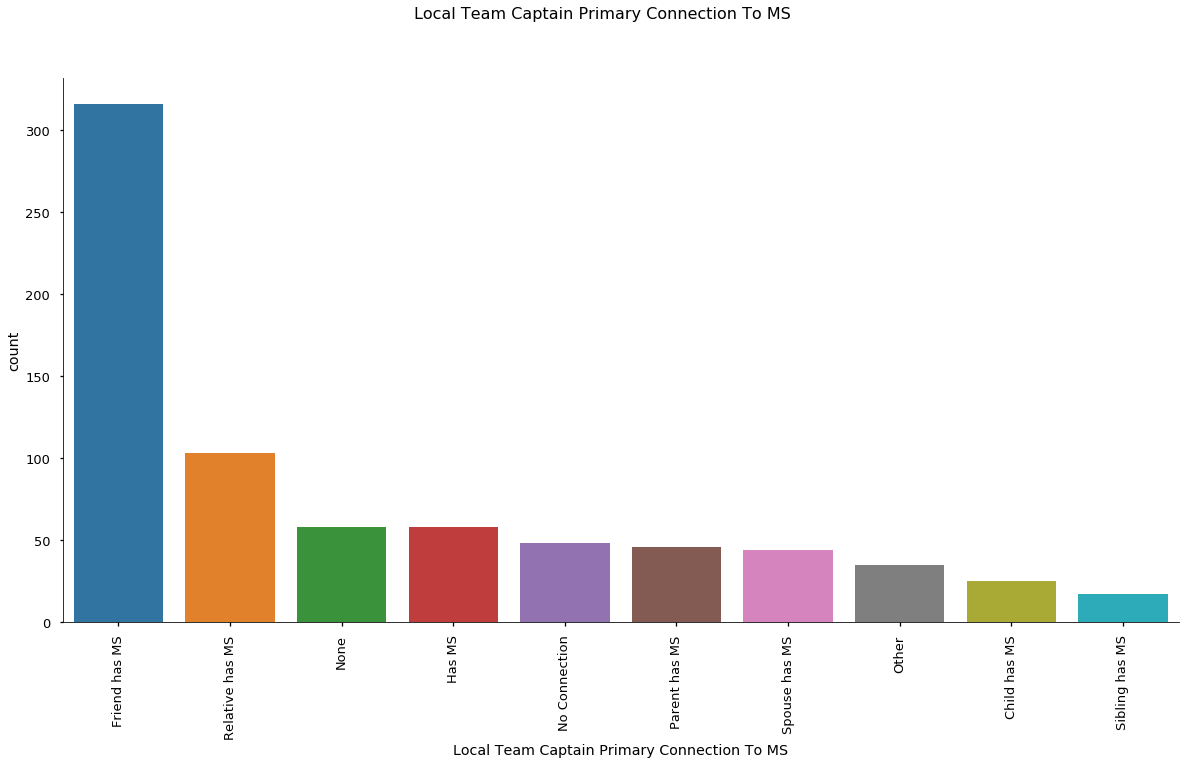

In [11]:
plt.figure(figsize=(20,10))
sns.set_context("talk")
sns.countplot(x='Local Team Captain Primary Connection To MS', data=nationalteams,order = nationalteams['Local Team Captain Primary Connection To MS'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS', fontsize=16)
sns.despine()


In [12]:
#compute count of values in columns
nationalteams['Local Team Captain Primary Connection To MS'].value_counts()

Friend has MS      316
Relative has MS    103
None                58
Has MS              58
No Connection       48
Parent has MS       46
Spouse has MS       44
Other               35
Child has MS        25
Sibling has MS      17
Name: Local Team Captain Primary Connection To MS, dtype: int64

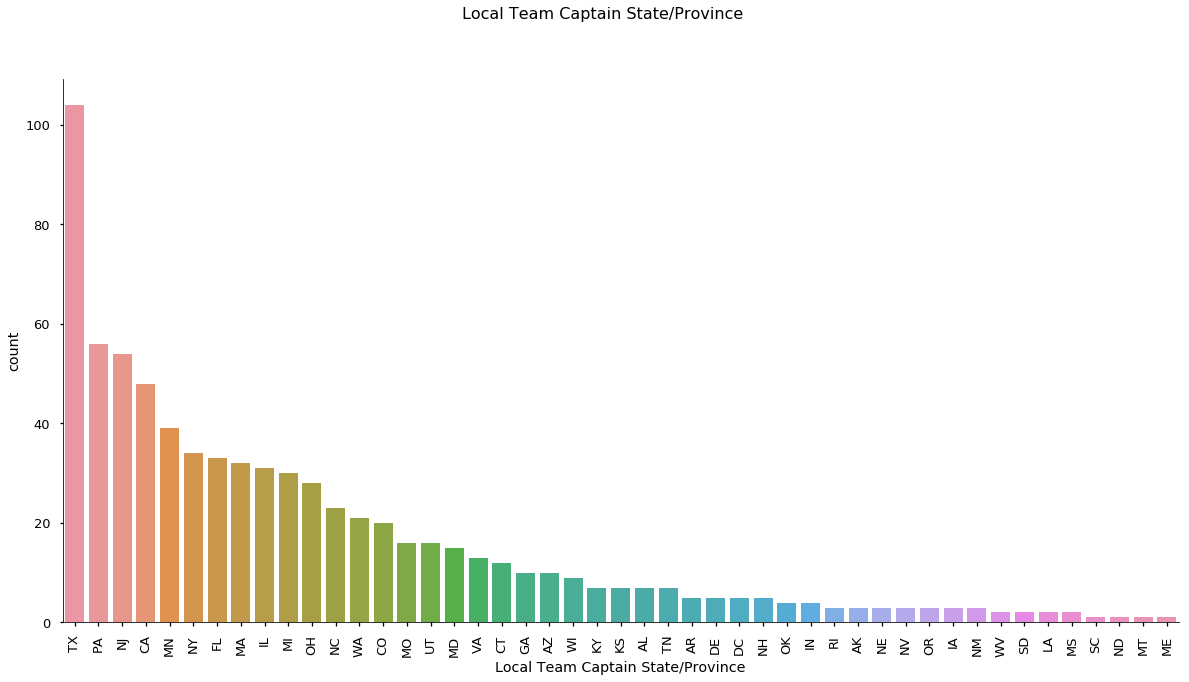

In [13]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain State/Province', data=nationalteams,order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain State/Province', fontsize=16)

sns.despine()
#plt.tight_layout()

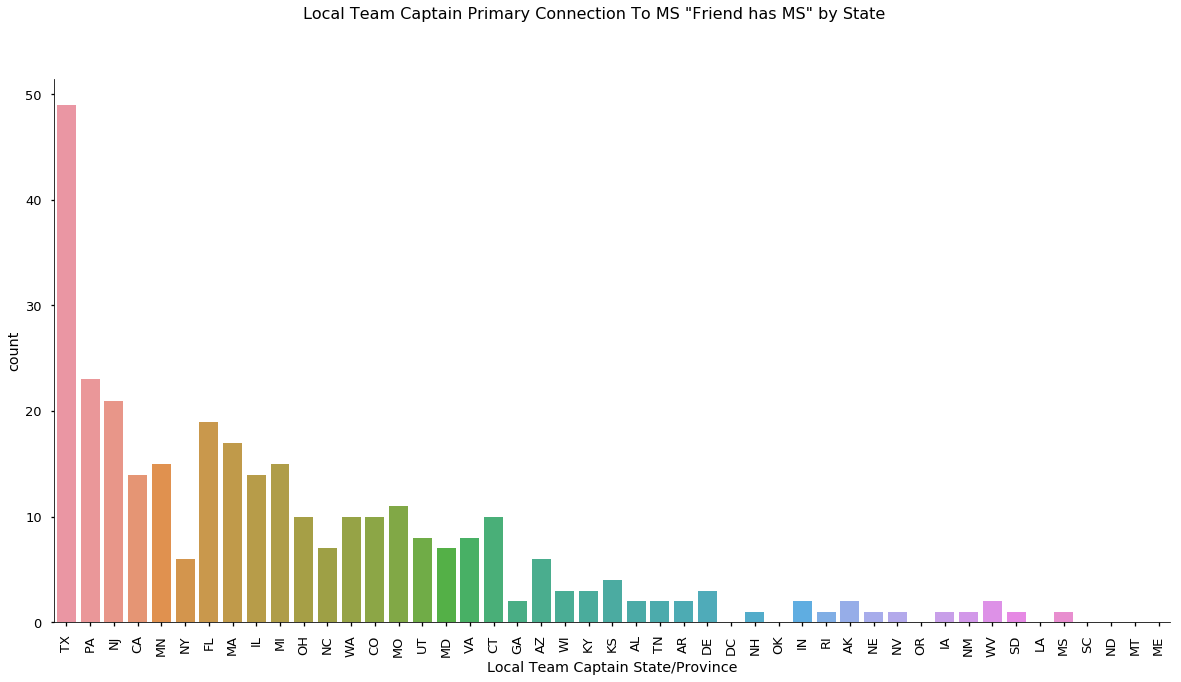

In [14]:

#sns.set_context("paper")
plt.figure(figsize=(20,10))

sns.countplot(x='Local Team Captain State/Province', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'Friend has MS'],order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS "Friend has MS" by State', fontsize=16)

sns.despine()

In [15]:

#sns.set_context("paper")
plt.figure(figsize=(20,10))

sns.countplot(x='Local Team Captain State/Province', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] != 'Friend has MS'],order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is NOT "Friend has MS" by State', fontsize=16)

sns.despine()

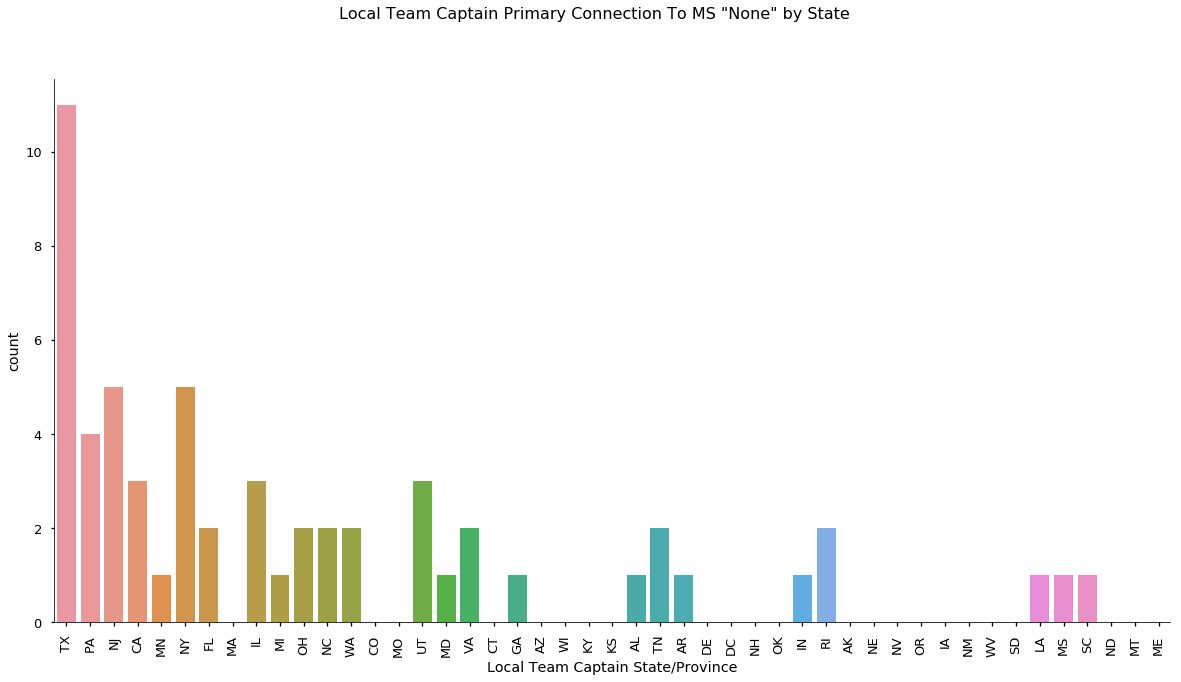

In [16]:

#sns.set_context("paper")
plt.figure(figsize=(20,10))

sns.countplot(x='Local Team Captain State/Province', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'None'],order = nationalteams['Local Team Captain State/Province'].value_counts().index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS "None" by State', fontsize=16)

sns.despine()

In [17]:
#compute count of values in columns
nationalteams['Local Team Captain Email Domain'].value_counts()

gmail.com                    215
yahoo.com                     85
hotmail.com                   45
aol.com                       28
comcast.net                   19
deloitte.com                  19
msn.com                       14
salesforce.com                12
sbcglobal.net                 10
kpmg.com                       9
wellsfargo.com                 8
pointb.com                     8
att.net                        8
ey.com                         7
nmss.org                       7
fmr.com                        7
cable.comcast.com              6
teamwingman.org                6
biogen.com                     5
live.com                       5
teamaudreysheroes.org          5
me.com                         5
cisco.com                      5
us.pwc.com                     5
accenture.com                  5
swbell.net                     5
verizon.net                    5
microsoft.com                  4
bm.com                         4
pepsico.com                    4
          

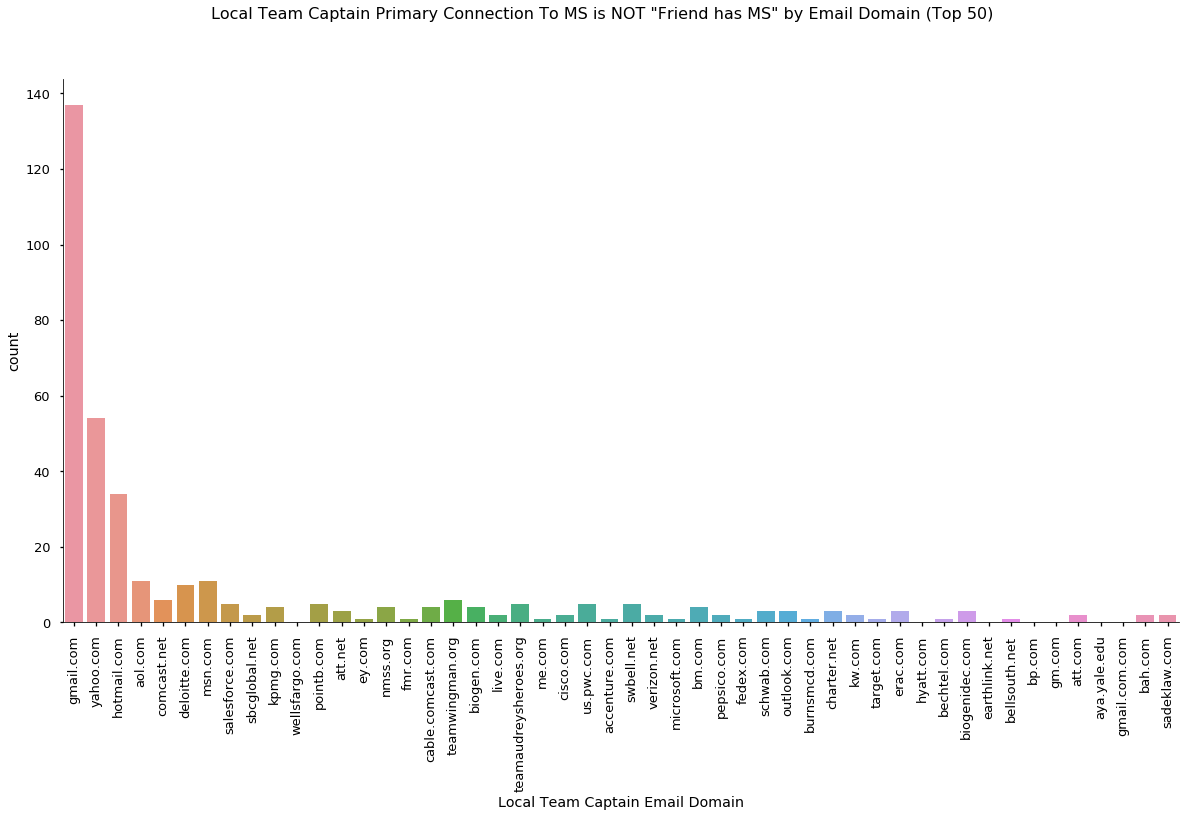

In [19]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain Email Domain', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] != 'Friend has MS'],order = nationalteams['Local Team Captain Email Domain'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is NOT "Friend has MS" by Email Domain (Top 50)', fontsize=16)

sns.despine()
#plt.tight_layout()

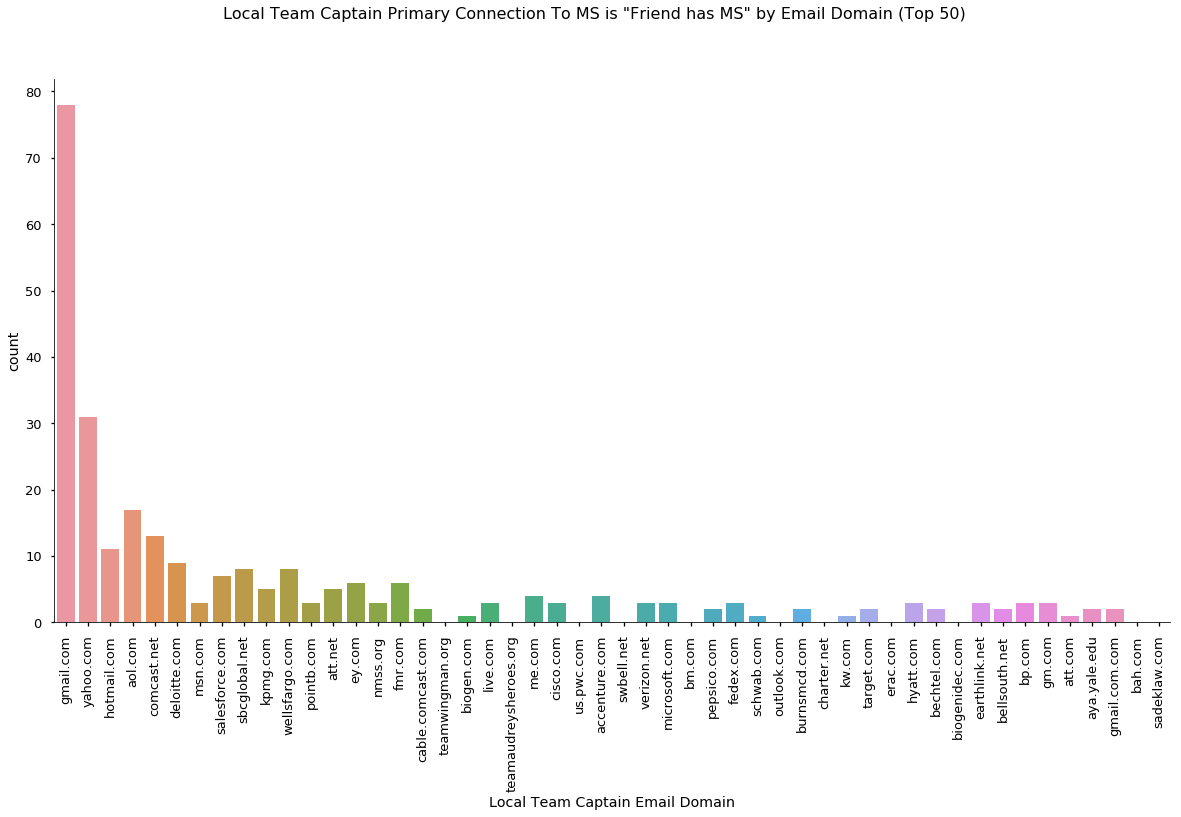

In [20]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain Email Domain', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'Friend has MS'],order = nationalteams['Local Team Captain Email Domain'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is "Friend has MS" by Email Domain (Top 50)', fontsize=16)


sns.despine()
#plt.tight_layout()

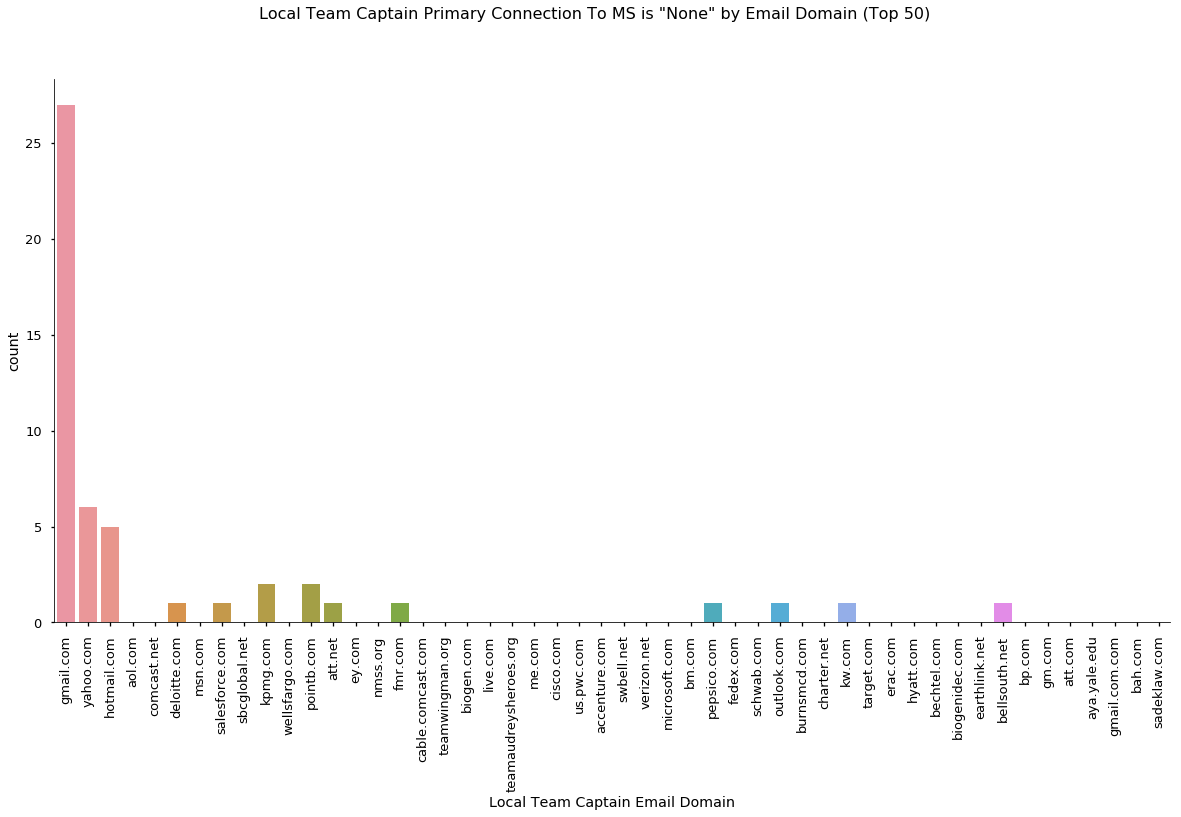

In [21]:
#sns.set_context("paper")
plt.figure(figsize=(20,10))
sns.countplot(x='Local Team Captain Email Domain', data=nationalteams[nationalteams['Local Team Captain Primary Connection To MS'] == 'None'],order = nationalteams['Local Team Captain Email Domain'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection To MS is "None" by Email Domain (Top 50)', fontsize=16)


sns.despine()
#plt.tight_layout()

In [12]:
#compute count of values in columns
nationalteams['Local Team Captain Contact By Email OK? (Y/N)'].value_counts()

Yes    576
No     174
Name: Local Team Captain Contact By Email OK? (Y/N), dtype: int64

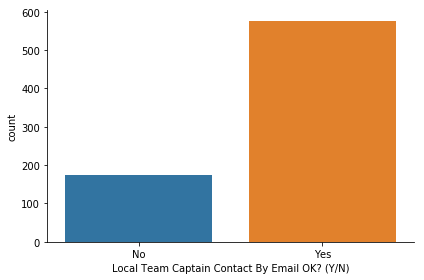

In [19]:
sns.countplot(x='Local Team Captain Contact By Email OK? (Y/N)', data=nationalteams)
sns.despine()
plt.tight_layout()

In [134]:
#compute count of values in columns
nationalteams['Revenue Raised'].value_counts()

0.00        83
50.00       16
100.00      14
35.00        9
300.00       9
1000.00      8
250.00       8
150.00       7
500.00       7
600.00       6
25.00        5
200.00       4
350.00       4
70.00        4
400.00       4
125.00       4
1060.00      3
1870.00      3
375.00       3
450.00       3
700.00       3
935.00       2
1835.00      2
885.00       2
725.00       2
650.00       2
535.00       2
800.00       2
930.00       2
290.00       2
            ..
29809.02     1
11093.35     1
71127.36     1
31507.00     1
2875.00      1
5015.00      1
5170.00      1
97819.62     1
22080.10     1
5365.00      1
4550.00      1
21845.20     1
25598.47     1
6034.99      1
1345.00      1
23103.40     1
12704.16     1
11610.00     1
12040.00     1
3615.00      1
1906.00      1
1110.00      1
2010.00      1
8020.00      1
5029.88      1
641.00       1
1615.00      1
1430.00      1
2420.00      1
390.00       1
Name: Revenue Raised, Length: 579, dtype: int64

Text(0.5,0.98,'Local Team Captain Primary Connection to MS by Revenue raised and OK to Email')

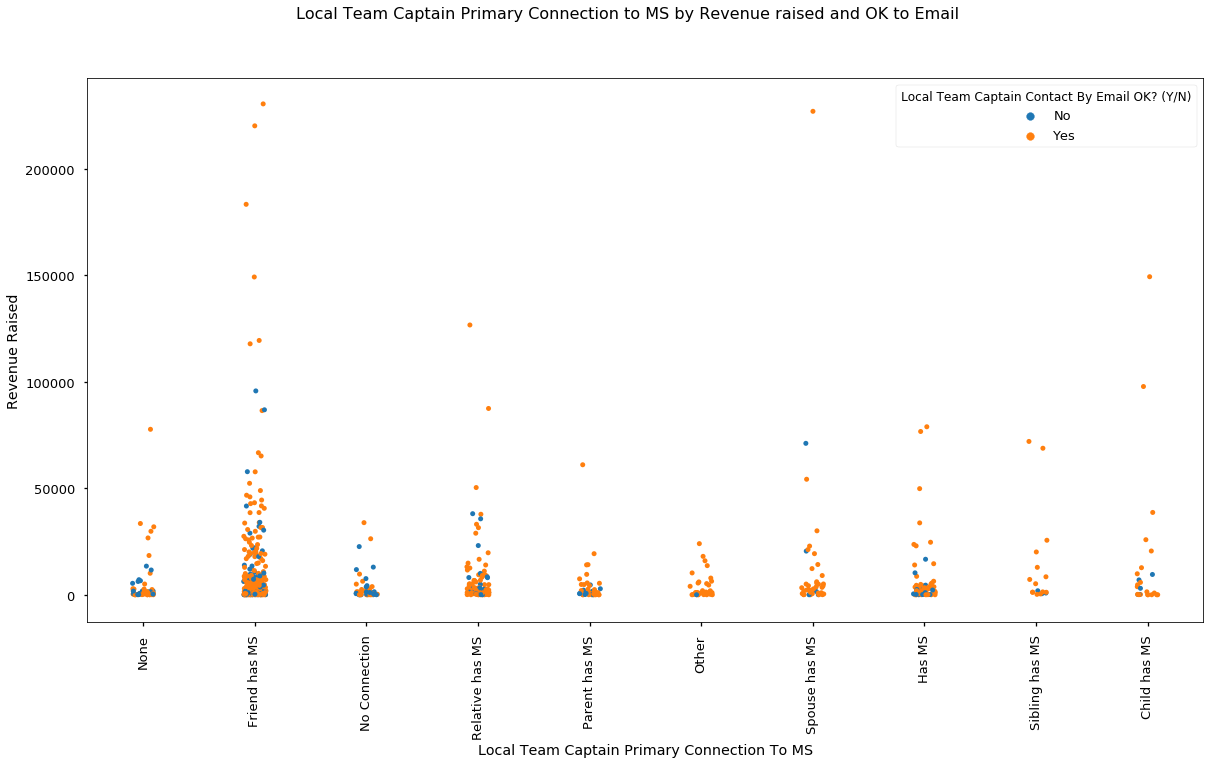

In [152]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Local Team Captain Primary Connection To MS", y="Revenue Raised", hue="Local Team Captain Contact By Email OK? (Y/N)",data=nationalteams, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain Primary Connection to MS by Revenue raised and OK to Email', fontsize=16)



Text(0.5,0.98,'Local Team Captain State/Province by Revenue raised and Local Team Captain Primary Connection to MS')

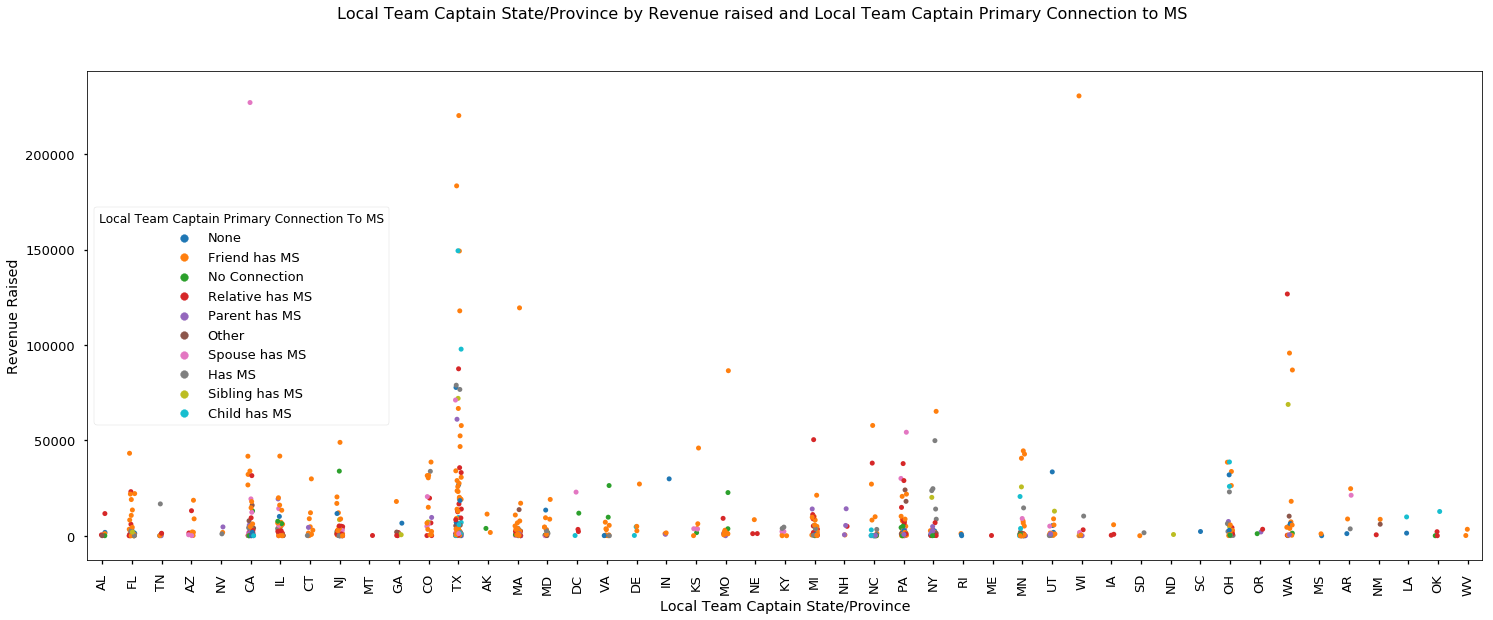

In [146]:
plt.figure(figsize=(25,9))

sns.stripplot(x="Local Team Captain State/Province", y="Revenue Raised", hue="Local Team Captain Primary Connection To MS",data=nationalteams, jitter=True)
plt.xticks(rotation=90)
plt.suptitle('Local Team Captain State/Province by Revenue raised and Local Team Captain Primary Connection to MS', fontsize=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

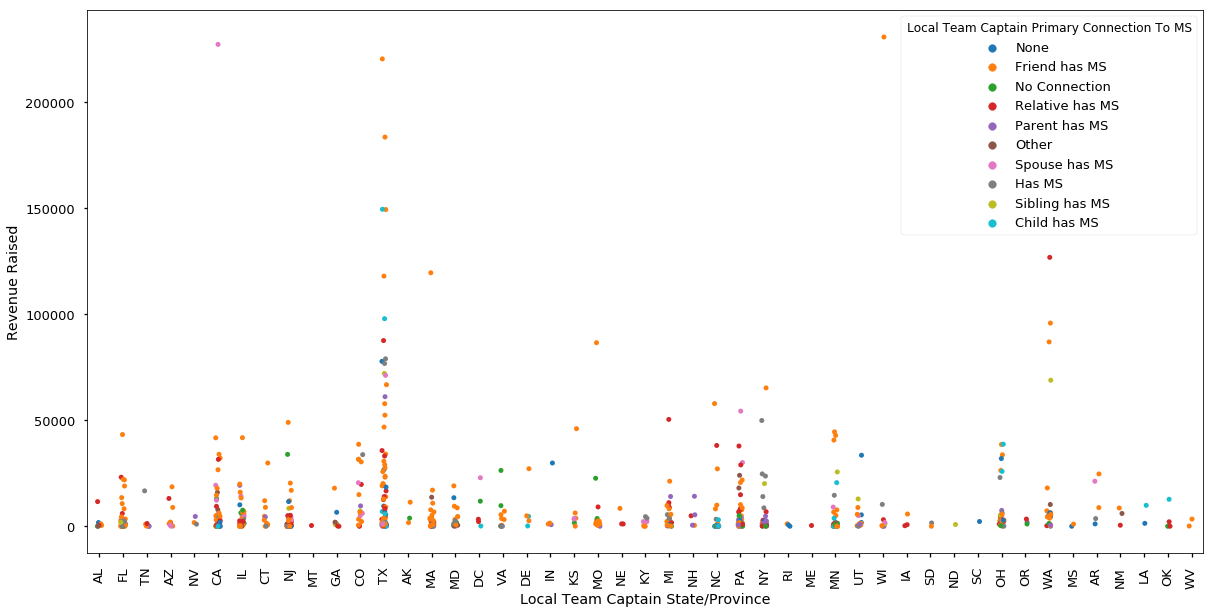

In [161]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Local Team Captain State/Province", y="Revenue Raised",hue="Local Team Captain Primary Connection To MS",data=nationalteams, jitter=True)
plt.xticks(rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]), <a list of 71 Text xticklabel objects>)

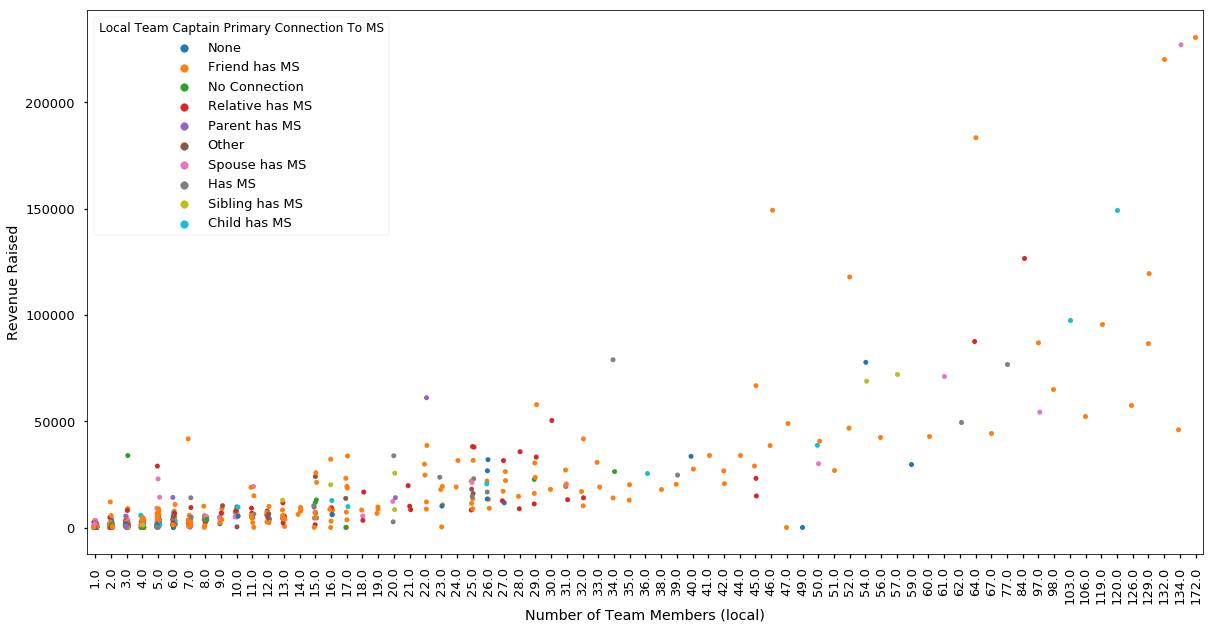

In [162]:
plt.figure(figsize=(20,10))

sns.stripplot(x="Number of Team Members (local)", y="Revenue Raised",hue="Local Team Captain Primary Connection To MS",data=nationalteams, jitter=True)
plt.xticks(rotation=90)

# Describing Data

In [5]:
dummy = pd.get_dummies(nationalteams['Local Team Captain Primary Connection To MS'])
nationalteamsd = pd.concat([nationalteams, dummy],axis=1)
nationalteamsd.head()


National Team Name Event Chapter Event Category           Event Type  \
0     Chevron Bike Team           ALC           Bike  MS 150 (2 Day Bike)   
1  EMD Serono Bike team           ALC           Bike           Bike 2 Day   
2                   NaN           ALC           Bike           Bike 2 Day   
3                   NaN           ALC           Bike           Bike 2 Day   
4                   NaN           ALC           Bike  MS 150 (2 Day Bike)   

      Local Team Name                         Event Name Event Start Date  \
0             Chevron  ALC 2016 Bike MS: Mississippi 150       2016-10-08   
1          EMD Serono    ALC 2017 Bike MS: Tour De Beach       2017-09-16   
2        Freewheelin'    ALC 2017 Bike MS: Tour De Beach       2017-09-16   
3  Team Rekosh Martin    ALC 2017 Bike MS: Tour De Beach       2017-09-16   
4    Bike Link Racing       2013 Bike MS - Tour de Beach       2013-09-21   

                 Location  Corporate Name  Revenue Raised      ...       \
0                     NaN             NaN          1745.0      ...        
1  Hampton Inns and Suite             NaN           390.0      ...        
2  Hampton Inns and Suite             NaN           400.0      ...        
3  Hampton Inns and Suite             NaN             0.0      ...        
4                     NaN             NaN          1085.0      ...        

   Child has MS  Friend has MS  Has MS No Connection None Other Parent has MS  \
0             0              0       0             0    1     0             0   
1             0              1       0             0    0     0             0   
2             0              0       0             0    1     0             0   
3             0              0       0             0    1     0             0   
4             0              1       0             0    0     0             0   

  Relative has MS Sibling has MS Spouse has MS  
0               0              0             0  
1               0              0             0  
2               0              0             0  
3               0              0             0  
4               0              0             0  

[5 rows x 37 columns]

In [6]:
dummy = pd.get_dummies(nationalteams['Local Team Captain State/Province'])
nationalteamsd = pd.concat([nationalteamsd, dummy],axis=1)
nationalteamsd.head()

National Team Name Event Chapter Event Category           Event Type  \
0     Chevron Bike Team           ALC           Bike  MS 150 (2 Day Bike)   
1  EMD Serono Bike team           ALC           Bike           Bike 2 Day   
2                   NaN           ALC           Bike           Bike 2 Day   
3                   NaN           ALC           Bike           Bike 2 Day   
4                   NaN           ALC           Bike  MS 150 (2 Day Bike)   

      Local Team Name                         Event Name Event Start Date  \
0             Chevron  ALC 2016 Bike MS: Mississippi 150       2016-10-08   
1          EMD Serono    ALC 2017 Bike MS: Tour De Beach       2017-09-16   
2        Freewheelin'    ALC 2017 Bike MS: Tour De Beach       2017-09-16   
3  Team Rekosh Martin    ALC 2017 Bike MS: Tour De Beach       2017-09-16   
4    Bike Link Racing       2013 Bike MS - Tour de Beach       2013-09-21   

                 Location  Corporate Name  Revenue Raised ...  RI  SC  SD TN  \
0                     NaN             NaN          1745.0 ...   0   0   0  0   
1  Hampton Inns and Suite             NaN           390.0 ...   0   0   0  0   
2  Hampton Inns and Suite             NaN           400.0 ...   0   0   0  0   
3  Hampton Inns and Suite             NaN             0.0 ...   0   0   0  1   
4                     NaN             NaN          1085.0 ...   0   0   0  0   

  TX UT VA WA WI WV  
0  0  0  0  0  0  0  
1  0  0  0  0  0  0  
2  0  0  0  0  0  0  
3  0  0  0  0  0  0  
4  0  0  0  0  0  0  

[5 rows x 84 columns]

In [9]:
dummy = pd.get_dummies(nationalteams['Local Team Captain Contact By Mail OK? (Y/N)'])
nationalteamsd = pd.concat([nationalteamsd, dummy],axis=1)
nationalteamsd.head()

National Team Name Event Chapter Event Category           Event Type  \
0     Chevron Bike Team           ALC           Bike  MS 150 (2 Day Bike)   
1  EMD Serono Bike team           ALC           Bike           Bike 2 Day   
2                   NaN           ALC           Bike           Bike 2 Day   
3                   NaN           ALC           Bike           Bike 2 Day   
4                   NaN           ALC           Bike  MS 150 (2 Day Bike)   

      Local Team Name                         Event Name Event Start Date  \
0             Chevron  ALC 2016 Bike MS: Mississippi 150       2016-10-08   
1          EMD Serono    ALC 2017 Bike MS: Tour De Beach       2017-09-16   
2        Freewheelin'    ALC 2017 Bike MS: Tour De Beach       2017-09-16   
3  Team Rekosh Martin    ALC 2017 Bike MS: Tour De Beach       2017-09-16   
4    Bike Link Racing       2013 Bike MS - Tour de Beach       2013-09-21   

                 Location  Corporate Name  Revenue Raised ...  SD  TN  TX UT  \
0                     NaN             NaN          1745.0 ...   0   0   0  0   
1  Hampton Inns and Suite             NaN           390.0 ...   0   0   0  0   
2  Hampton Inns and Suite             NaN           400.0 ...   0   0   0  0   
3  Hampton Inns and Suite             NaN             0.0 ...   0   1   0  0   
4                     NaN             NaN          1085.0 ...   0   0   0  0   

  VA WA WI WV No Yes  
0  0  0  0  0  1   0  
1  0  0  0  0  0   1  
2  0  0  0  0  0   1  
3  0  0  0  0  1   0  
4  0  0  0  0  1   0  

[5 rows x 86 columns]

In [10]:
nationalteamsd.describe()

Corporate Name  Revenue Raised  Number of Team Members (local)  \
count             0.0      810.000000                      747.000000   
mean              NaN     8817.188235                       11.825971   
std               NaN    22295.006194                       19.893934   
min               NaN        0.000000                        1.000000   
25%               NaN      346.250000                        2.000000   
50%               NaN     1692.500000                        5.000000   
75%               NaN     6713.750000                       13.000000   
max               NaN   230589.240000                      172.000000   

       Local Team Captain Member ID  Local Team Captain Contact ID  \
count                  7.500000e+02                   7.500000e+02   
mean                   7.024954e+07                   9.536586e+06   
std                    1.650461e+07                   4.952077e+06   
min                    4.026545e+07                   1.566841e+06   
25%                    5.676256e+07                   5.098983e+06   
50%                    7.224181e+07                   1.007511e+07   
75%                    8.655341e+07                   1.444141e+07   
max                    9.126578e+07                   1.633998e+07   

       Local Team Captain Zip Code  Child has MS  Friend has MS      Has MS  \
count                   743.000000    917.000000     917.000000  917.000000   
mean                  47776.527591      0.027263       0.344602    0.063250   
std                   30386.481008      0.162937       0.475498    0.243544   
min                    1085.000000      0.000000       0.000000    0.000000   
25%                   19357.500000      0.000000       0.000000    0.000000   
50%                   48334.000000      0.000000       0.000000    0.000000   
75%                   77072.000000      0.000000       1.000000    0.000000   
max                   99507.000000      1.000000       1.000000    1.000000   

       No Connection     ...              SD          TN          TX  \
count     917.000000     ...      917.000000  917.000000  917.000000   
mean        0.052345     ...        0.002181    0.007634    0.113413   
std         0.222843     ...        0.046676    0.087084    0.317270   
min         0.000000     ...        0.000000    0.000000    0.000000   
25%         0.000000     ...        0.000000    0.000000    0.000000   
50%         0.000000     ...        0.000000    0.000000    0.000000   
75%         0.000000     ...        0.000000    0.000000    0.000000   
max         1.000000     ...        1.000000    1.000000    1.000000   

               UT          VA          WA          WI          WV          No  \
count  917.000000  917.000000  917.000000  917.000000  917.000000  917.000000   
mean     0.017448    0.014177    0.022901    0.009815    0.002181    0.126499   
std      0.131006    0.118283    0.149669    0.098635    0.046676    0.332593   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Yes  
count  917.000000  
mean     0.691385  
std      0.462174  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

[8 rows x 65 columns]

In [11]:
nationalteamsd.corr()


Corporate Name  Revenue Raised  \
Corporate Name                             NaN             NaN   
Revenue Raised                             NaN        1.000000   
Number of Team Members (local)             NaN        0.849245   
Local Team Captain Member ID               NaN       -0.139503   
Local Team Captain Contact ID              NaN       -0.153347   
Local Team Captain Zip Code                NaN        0.164791   
Child has MS                               NaN        0.054771   
Friend has MS                              NaN        0.105802   
Has MS                                     NaN       -0.009786   
No Connection                              NaN       -0.058705   
None                                       NaN       -0.041538   
Other                                      NaN       -0.047202   
Parent has MS                              NaN       -0.053773   
Relative has MS                            NaN       -0.014359   
Sibling has MS                             NaN        0.030498   
Spouse has MS                              NaN        0.043819   
AK                                         NaN       -0.008746   
AL                                         NaN       -0.027815   
AR                                         NaN        0.010788   
AZ                                         NaN       -0.020343   
CA                                         NaN        0.032729   
CO                                         NaN        0.033012   
CT                                         NaN       -0.018344   
DC                                         NaN       -0.002698   
DE                                         NaN       -0.003310   
FL                                         NaN       -0.027598   
GA                                         NaN       -0.028600   
IA                                         NaN       -0.017973   
IL                                         NaN       -0.019041   
IN                                         NaN       -0.001709   
...                                        ...             ...   
ME                                         NaN       -0.013116   
MI                                         NaN       -0.023243   
MN                                         NaN       -0.029508   
MO                                         NaN       -0.000575   
MS                                         NaN       -0.018571   
MT                                         NaN       -0.013313   
NC                                         NaN       -0.017741   
ND                                         NaN       -0.012090   
NE                                         NaN       -0.014455   
NH                                         NaN       -0.013250   
NJ                                         NaN       -0.053492   
NM                                         NaN       -0.010369   
NV                                         NaN       -0.017462   
NY                                         NaN       -0.015038   
OH                                         NaN        0.007753   
OK                                         NaN       -0.016172   
OR                                         NaN       -0.018285   
PA                                         NaN       -0.026974   
RI                                         NaN       -0.022513   
SC                                         NaN       -0.009692   
SD                                         NaN       -0.017946   
TN                                         NaN       -0.025050   
TX                                         NaN        0.221785   
UT                                         NaN       -0.024844   
VA                                         NaN       -0.025645   
WA                                         NaN        0.093459   
WI                                         NaN        0.088807   
WV                                         NaN       -0.015814   
No                                         NaN        0.031520   
Yes   

# FIRST PRIORITY: CORPORATE ACQUISITION
  * What are the greatest growth opportunities for new corporate teams?
  * Can we apply those opportunities to specific rides/markets, especially our biggest events?
  * What industries have had the strongest involvement in Bike MS in the last five years?
  * What occupations were responsible for most of our fundraising?
  * Can we tie together these industries and occupations to identify gaps/opportunities?
  * What is the common denominator for our top performing corporate teams? (Is it industry, culture, executive involvement, connection to MS, other?)
  * Can we quantify the effect competing events are having in our top markets? 
Top competitors:
   1. Best Buddies
     * HYANNIS PORT June 2, 2018 Boston to Hyannis Port, MA
     * HEARST CASTLE September 8, 2018 San Simeon, CA
     * MIAMI November 16, 2018 Miami, FL
   2. Peddle the Cause
     * Louis
     * San Diego
   3. Pelatonia – OH
   4. PanMass Challenge - Boston
   5. ADA – Tour de Cure
   6. Jude Children’s Research Hospital
   7. JDRF Ride to Cure Diabetes
   8. Cycle for Life - Cystic Fibrosis Foundation
   9. Ride to Recovery
   10. Virtual Cycling
   11. Athletic Club Stationary Cycling Relays
   12. American Cancer Society
   13. Leukemia and Lymphoma Society – Team in Training

# SECOND PRIORITY: DIGITAL/SOCIAL ACQUISITION
  * What are the greatest opportunities for digital marketing investments? Where have we seen the greatest ROI?
  * Once someone is registered, what tactics and behaviors drive fundraising, and at what times leading up to the event?
  * What behavioral data do you see about usage of our fundraising tools and how it may or may not relate to performance of top fundraisers?
  * Despite increasing our digital advertising spend, acquisition continues to trend downward overall. Why? Is it an issue of needing more traffic, better targeting, or a conversion rate issue that needs to be addressed through the registration process? What can we do to reverse the trend?


# FINALLY:
  * As you studied this data, is there something else that came up as an insight into our operations that the questions above do not capture? 


# Descriptive Analytics